In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
stock_prices = pd.read_csv("../stock_prices.csv")
len(stock_prices)

2332531

In [4]:
secondary_stock_prices = pd.read_csv("../secondary_stock_prices.csv")
supplemental_prices = pd.read_csv("../supplimental_stock_prices.csv")
supplemental_secondary_stock_prices = pd.read_csv("../supplimental_secondary_stock_prices.csv")
stock_prices = stock_prices.append(secondary_stock_prices)
stock_prices = stock_prices.append(supplemental_prices)
stock_prices = stock_prices.append(supplemental_secondary_stock_prices)
len(stock_prices)

/var/folders/df/hv6t4fkd2tq0qjflfg5wj3cw0000gr/T/ipykernel_31013/2175988910.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_prices = stock_prices.append(secondary_stock_prices)
/var/folders/df/hv6t4fkd2tq0qjflfg5wj3cw0000gr/T/ipykernel_31013/2175988910.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_prices = stock_prices.append(supplemental_prices)
/var/folders/df/hv6t4fkd2tq0qjflfg5wj3cw0000gr/T/ipykernel_31013/2175988910.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_prices = stock_prices.append(supplemental_secondary_stock_prices)


5271570

In [5]:
stock_prices.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [6]:
stock_prices.isna().sum()

RowId                     0
Date                      0
SecuritiesCode            0
Open                 110826
High                 110826
Low                  110826
Close                110826
Volume                    0
AdjustmentFactor          0
ExpectedDividend    5230197
SupervisionFlag           0
Target                 1046
dtype: int64

In [7]:
from scipy import stats
import datetime as dt
def pre_process(data):
    data['ExpectedDividend'] = data['ExpectedDividend'].fillna(0)
    data["SupervisionFlag"] = data["SupervisionFlag"].astype(int)
    data['Target'] = data['Target'].fillna(0)
    
    cols = ['Open', 'High', 'Low', 'Close']
    data.loc[:,cols] = data.loc[:,cols].ffill()
    data.loc[:,cols] = data.loc[:,cols].bfill()
    # data = data.drop(['RowId', 'High', 'Low', 'Target'], axis=1)
    data = data.drop(['RowId', 'Target'], axis=1)
    data['Date'] = pd.to_datetime(data['Date'])
    data['Date']=data['Date'].map(dt.datetime.toordinal)
    
    return data

In [8]:
data = pre_process(stock_prices)

In [9]:
# Predicting the Close price for the stock
X_data = data.drop(['Close'], axis=1)
y_data = data['Close']

### Train test split


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X_data,y_data,test_size =0.2)
print("Length of training dataset:", len(x_train))
print("Length of training dataset:", len(x_test))

Length of training dataset: 4217256
Length of training dataset: 1054314


# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [12]:
# Metrics

from sklearn import metrics

lr_pred_train = lr_model.predict(x_train)
lr_pred = lr_model.predict(x_test)
metrics.max_error(y_test, lr_pred)

print('Root Mean Square Error for Linear Regression (Training data):\
    %.3f' % np.sqrt(metrics.mean_squared_error(y_train, lr_pred_train)))
print('Root Mean Square Error for Linear Regression (Testing data):\
    %.3f' % np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print("R2 score:", metrics.r2_score(y_test, lr_pred))

Root Mean Square Error for Linear Regression (Training data):    226.848
Root Mean Square Error for Linear Regression (Testing data):    227.506
R2 score: 0.9999576942199392


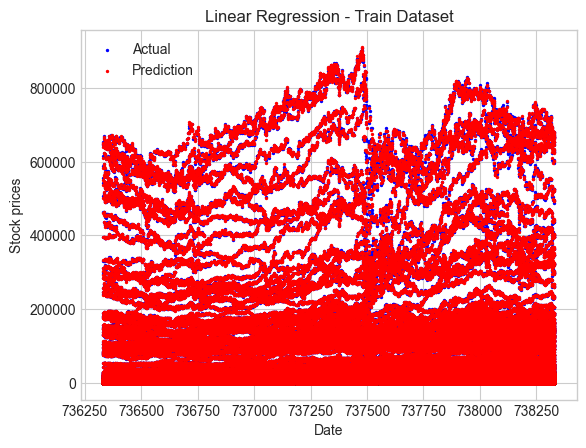

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x_train['Date'], y_train, color = 'blue', label='Actual', s=2) # plotting the training set
plt.scatter(x_train['Date'], lr_pred_train, color = 'red', label='Prediction', s=2)
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.title('Linear Regression - Train Dataset')
plt.legend()
plt.show()

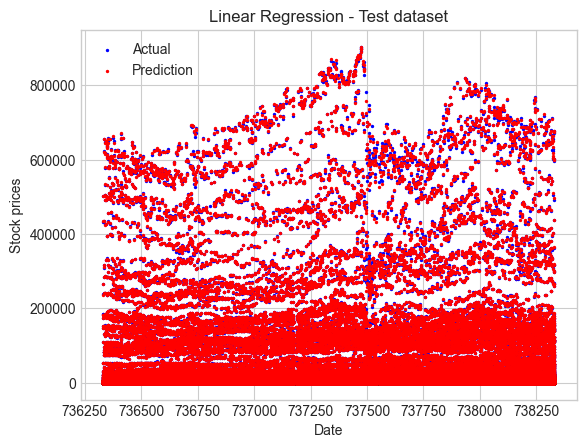

In [39]:
import matplotlib.pyplot as plt
plt.scatter(x_test['Date'], y_test, color = 'blue', label='Actual', s=2) # plotting the training set
plt.scatter(x_test['Date'], lr_pred, color = 'red', label='Prediction', s=2)
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.title('Linear Regression - Test dataset')
plt.legend()
plt.show()

# Support Vector Regression

In [18]:
svr_data = data[data['SecuritiesCode']==1333]
# svr_data.drop(['SecuritiesCode'], )
svr_X_data = svr_data.drop(['Close', 'SecuritiesCode'], axis=1)
svr_y_data = svr_data['Close']
svr_x_train, svr_x_test, svr_y_train, svr_y_test = train_test_split(svr_X_data,svr_y_data,test_size =0.2)
# print(len(svr_x_train))
# print(len(svr_x_test))

1069
268


In [19]:
from sklearn.svm import SVR
svr_model = SVR(kernel = 'rbf')
svr_model.fit(svr_x_train, svr_y_train)

svr_pred_train = svr_model.predict(svr_x_train)
svr_pred = svr_model.predict(svr_x_test)
# metrics.max_error(y_test, svr_pred)

print('Root Mean Square Error for Support Vector Regression (Training data):\
    %.3f' % np.sqrt(metrics.mean_squared_error(svr_y_train, svr_pred_train)))
print('Root Mean Square Error for Support Vector Regression (Testing data):\
    %.3f' % np.sqrt(metrics.mean_squared_error(svr_y_test, svr_pred)))
print("R2 score:", metrics.r2_score(svr_y_test, svr_pred))

Root Mean Square Error for Support Vector Regression (Training data):    632.192
Root Mean Square Error for Support Vector Regression (Testing data):    649.566
R2 score: -0.0967784971130965


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


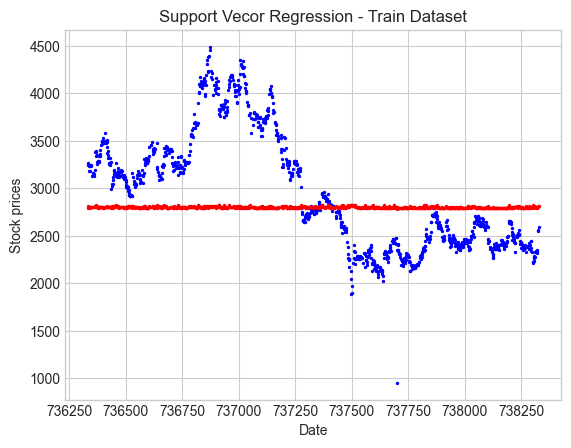

In [42]:
import matplotlib.pyplot as plt
plt.scatter(svr_x_train['Date'], svr_y_train, color = 'blue', s=2) # plotting the training set
plt.scatter(svr_x_train['Date'], svr_pred_train, color = 'red', s=2)
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.title('Support Vecor Regression - Train Dataset')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


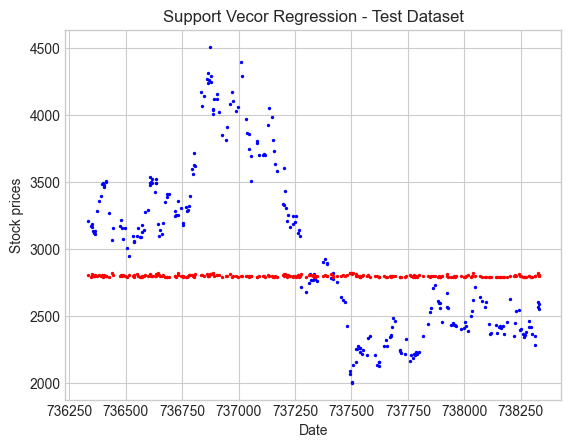

In [47]:
import matplotlib.pyplot as plt
plt.scatter(svr_x_test['Date'], svr_y_test, color = 'blue', s=2) # plotting the training set
plt.scatter(svr_x_test['Date'], svr_pred, color = 'red', s=2)
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.title('Support Vecor Regression - Test Dataset')
plt.legend()
plt.show()

# Random Forest Regressor

In [59]:
# Data prep for one of the Securities
rf_data = data[data['SecuritiesCode']==1429]
rf_X_data = rf_data.drop(['Close', 'SecuritiesCode'], axis=1)
rf_y_data = rf_data['Close']
rf_x_train, rf_x_test, rf_y_train, rf_y_test = train_test_split(rf_X_data,rf_y_data,test_size =0.2)
print("Total training dataset: ", len(rf_x_train))
print("Total testing dataset: ", len(rf_x_test))


Total training dataset:  1069
Total testing dataset:  268


In [60]:
# Training the model 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(rf_x_train, rf_y_train)
rf_train_predict = rf.predict(rf_x_train)
rf_test_predict = rf.predict(rf_x_test)
np.sqrt(metrics.mean_squared_error(rf_y_test, rf_test_predict))

10.085208897101605

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


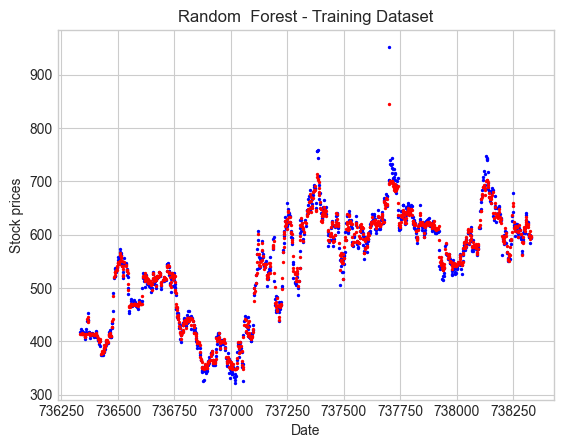

In [61]:
#  Metrics 
import matplotlib.pyplot as plt
plt.scatter(rf_x_train['Date'], rf_y_train, color = 'blue', s=2) # plotting the training set
plt.scatter(rf_x_train['Date'], rf_train_predict, color = 'red', s=2)
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.title('Random  Forest - Training Dataset')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


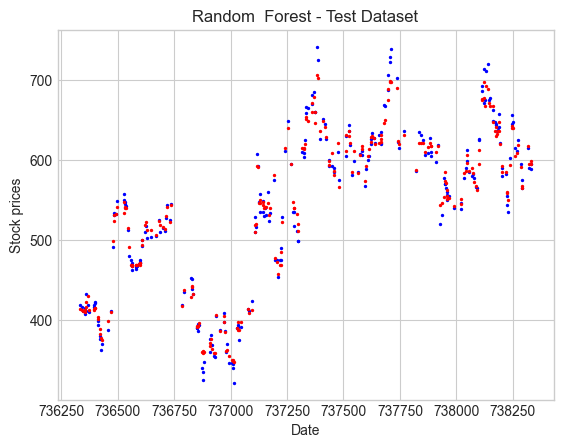

In [62]:
# Metrics 
import matplotlib.pyplot as plt
plt.scatter(rf_x_test['Date'], rf_y_test, color = 'blue', s=2) # plotting the training set
plt.scatter(rf_x_test['Date'], rf_test_predict, color = 'red', s=2)
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.title('Random  Forest - Test Dataset')
plt.legend()
plt.show()